# Speed test Cats vs. Dogs image classification task with fastai v1.0 and PyTorch v1.0 Preview
## By: Jeff Hale
## Oct. 2018

In [1]:
import torch

print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

import fastai
print(fastai.__version__)

from fastai import *
from fastai.vision import *

1.0.0.dev20181021
True
True
1.0.11


In [2]:
path = untar_data(URLs.DOGS)
path

PosixPath('/home/jupyter/.fastai/data/dogscats')

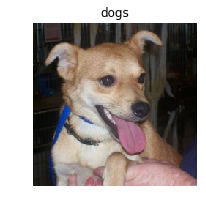

In [3]:
data = ImageDataBunch.from_folder(
    path, 
    ds_tfms=get_transforms(), 
    tfms=imagenet_norm, 
    size=224,
)
img,label = data.valid_ds[-1]
img.show(title=data.classes[label])

In [ ]:
%%time
learn = ConvLearner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(1)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/jupyter/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 88008778.30it/s]


In [ ]:
%%time
learn.unfreeze()
learn.fit_one_cycle(1, slice(1e-5,3e-4), pct_start=0.05)

In [ ]:
%%time
accuracy(*learn.TTA())